In [2]:
import matplotlib.pyplot as plt
import os
from urllib.parse import urlparse
import pandas as pd
import random


In [3]:
import numpy as np
imagenes = np.loadtxt("20_images.txt", dtype="str")
imagenes

array(['https://i.ytimg.com/vi/bDPkImgNs8Y/maxresdefault.jpg',
       'https://e00-marca.uecdn.es/albumes/2014/11/18/comics_nba/1416295630_extras_albumes_0_980.jpg',
       'https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/fairy-tail-natsu-padres-1559572361.png',
       'https://upload.wikimedia.org/wikipedia/commons/thumb/5/50/Jacques-Louis_David_-_The_Emperor_Napoleon_in_His_Study_at_the_Tuileries_-_Google_Art_Project.jpg/800px-Jacques-Louis_David_-_The_Emperor_Napoleon_in_His_Study_at_the_Tuileries_-_Google_Art_Project.jpg',
       'https://upload.wikimedia.org/wikipedia/en/e/e9/Hakusho_gamelogo.jpg',
       'https://assets.mycast.io/actor_images/actor-perfect-cell-205160_large.jpg?1619298196',
       'https://www.rd.com/wp-content/uploads/2019/01/shutterstock_673465372.jpg?fit=700,467',
       'https://static9.depositphotos.com/1010305/1139/i/600/depositphotos_11390423-stock-photo-kitten-on-a-white-background.jpg',
       'https://wallpaper.dog/large/20523050.png',
    

In [4]:
nom_img = []
for i in range(20):
    a = urlparse(imagenes[i])                 
    nom_img.append(os.path.basename(a.path)) 

In [4]:
for i in range(20):
    os.system(f'curl -o {nom_img[i]} {imagenes[i]}')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 99736  100 99736    0     0   470k      0 --:--:-- --:--:-- --:--:--  468k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  143k  100  143k    0     0  1576k      0 --:--:-- --:--:-- --:--:-- 1576k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1365k  100 1365k    0     0  2881k      0 --:--:-- --:--:-- --:--:-- 2881k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  215k  100  215k    0     0   841k      0 --:--:-- --:--:-- --:--:--  838k
  % Total    % Received % Xferd  Average Speed   Tim

In [5]:
nom_img

['maxresdefault.jpg',
 '1416295630_extras_albumes_0_980.jpg',
 'fairy-tail-natsu-padres-1559572361.png',
 '800px-Jacques-Louis_David_-_The_Emperor_Napoleon_in_His_Study_at_the_Tuileries_-_Google_Art_Project.jpg',
 'Hakusho_gamelogo.jpg',
 'actor-perfect-cell-205160_large.jpg',
 'shutterstock_673465372.jpg',
 'depositphotos_11390423-stock-photo-kitten-on-a-white-background.jpg',
 '20523050.png',
 '41b9u-1yUVS._AC_.jpg',
 'cthulhu-2.jpg',
 'il_1080xN.3926159075_hj39.jpg',
 'fan-art-chihiro-7.jpg',
 '557b36ec0911375e91f88c45b9e30a92--batman-animado-chibi.jpg',
 'il_fullxfull.4384629284_5nk6.jpg',
 'CEIJaGZP_400x400.jpg',
 'Bart_Simpson_200px.png',
 'tvkk3sxgp8181.png',
 'eed60545d30bafa2dd7ce23e9c076801--los-simpsons-cartoon-characters.jpg',
 'elephant-297205_960_720-768x558.png']

In [6]:
from joblib import Parallel, delayed

def vector(x):
    return plt.imread(x)

resVec = Parallel(n_jobs=4)(delayed(vector)(i) for i in nom_img)

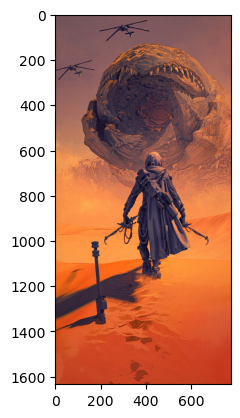

In [111]:

plt.imshow(resVec[8])
plt.show()

In [7]:
def color(x):
    return np.unique(x.reshape(-1, x.shape[2]), axis=0)[0]

resCol = Parallel(n_jobs=4)(delayed(color)(i) for i in resVec)

In [19]:
resCol

[array([0, 0, 0], dtype=uint8),
 array([0, 0, 0], dtype=uint8),
 array([0.09411765, 0.        , 0.        ], dtype=float32),
 array([0, 0, 0], dtype=uint8),
 array([0, 0, 0], dtype=uint8),
 array([0, 0, 0], dtype=uint8),
 array([6, 0, 0], dtype=uint8),
 array([10,  1,  0], dtype=uint8),
 array([0.        , 0.        , 0.01568628, 1.        ], dtype=float32),
 array([0, 0, 0], dtype=uint8),
 array([0, 2, 0], dtype=uint8),
 array([0, 0, 0], dtype=uint8),
 array([ 0, 23,  0], dtype=uint8),
 array([0, 0, 0], dtype=uint8),
 array([0, 0, 0], dtype=uint8),
 array([26, 17,  8], dtype=uint8),
 array([0., 0., 0., 0.], dtype=float32),
 array([0.        , 0.29411766, 0.72156864, 1.        ], dtype=float32),
 array([0, 0, 0], dtype=uint8),
 array([0., 0., 0., 0.], dtype=float32)]

In [16]:
def genCol(x):
    r = random.uniform(0, 1)
    if np.all(x) == 0:
        if x.dtype == 'float32':
            return x+r
        else:
            return np.multiply([255,255,255],r)
    else:
        a = np.multiply(x,r)
        return a

newCol = Parallel(n_jobs=4)(delayed(genCol)(i)for i in resCol)

In [15]:
newCol

[array([3.81880116, 3.81880116, 3.81880116]),
 array([195.13573915, 195.13573915, 195.13573915]),
 array([0.6037329 , 0.50961524, 0.50961524], dtype=float32),
 array([19.52535589, 19.52535589, 19.52535589]),
 array([245.59330849, 245.59330849, 245.59330849]),
 array([109.16954154, 109.16954154, 109.16954154]),
 array([193.65766323, 193.65766323, 193.65766323]),
 array([146.31972743, 146.31972743, 146.31972743]),
 array([0.07824598, 0.07824598, 0.09393225, 1.078246  ], dtype=float32),
 array([12.73381834, 12.73381834, 12.73381834]),
 array([110.35122192, 110.35122192, 110.35122192]),
 array([5.51691679, 5.51691679, 5.51691679]),
 array([71.30111359, 71.30111359, 71.30111359]),
 array([244.56087742, 244.56087742, 244.56087742]),
 array([221.713186, 221.713186, 221.713186]),
 array([18.33356595, 11.98733158,  5.64109722]),
 array([0.9760955, 0.9760955, 0.9760955, 0.9760955], dtype=float32),
 array([0.48879358, 0.78291124, 1.2103622 , 1.4887936 ], dtype=float32),
 array([13.86941496, 13.86

In [29]:
def cambioCol(i):
    resVec[i][resVec[i] == resCol[i]] = newCol[i]

for i in range(20):
    resVec[i][resVec[i] == resCol[i]] = newCol[i]

ValueError: assignment destination is read-only

In [30]:
resVec[0][resVec[0] == resCol[0]]


array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [24]:
datos = {'Imagen': imagenes[:20],
        'Antiguo Color': resCol,
        'Nuevo Color': newCol}
df_img = pd.DataFrame(datos)
df_img

,Imagen,Antiguo Color,Nuevo Color
0,https://i.ytimg.com/vi/bDPkImgNs8Y/maxresdefau...,"[0, 0, 0]","[93.36649148580149, 93.36649148580149, 93.3664..."
1,https://e00-marca.uecdn.es/albumes/2014/11/18/...,"[0, 0, 0]","[73.36897206519271, 73.36897206519271, 73.3689..."
2,https://hips.hearstapps.com/hmg-prod.s3.amazon...,"[0.09411765, 0.0, 0.0]","[0.8491937, 0.75507605, 0.75507605]"
3,https://upload.wikimedia.org/wikipedia/commons...,"[0, 0, 0]","[244.49349812481827, 244.49349812481827, 244.4..."
4,https://upload.wikimedia.org/wikipedia/en/e/e9...,"[0, 0, 0]","[29.945361167644652, 29.945361167644652, 29.94..."
5,https://assets.mycast.io/actor_images/actor-pe...,"[0, 0, 0]","[230.60394609241172, 230.60394609241172, 230.6..."
6,https://www.rd.com/wp-content/uploads/2019/01/...,"[6, 0, 0]","[187.8744369100749, 187.8744369100749, 187.874..."
7,https://static9.depositphotos.com/1010305/1139...,"[10, 1, 0]","[88.34199220193706, 88.34199220193706, 88.3419..."
8,https://wallpaper.dog/large/20523050.png,"[0.0, 0.0, 0.015686275, 1.0]","[0.08594107, 0.08594107, 0.10162734, 1.0859411]"
9,https://m.media-amazon.com/images/I/41b9u-1yUV...,"[0, 0, 0]","[142.73662684424008, 142.73662684424008, 142.7..."


In [10]:
### Los pasos que tengan * se deben hacer de manera paralelizada

## Primer paso: cargar los links desde un archivo txt a un arreglo
## *Segundo paso: transformar las imagenes a vectores 
## *Tercer paso: obtener el primer color de la imagen que se obtiene de: colors = np.unique(imagen.reshape(-1, imagen.shape[2]), axis=0)
## *Cuarto paso: cambiar el color de la imagen a un color random
## Quinto paso: hacer un dataframe que tenga el link de la imagen con una columna llamada url, su antiguo color con columna llamada 
## oldcolor y su nuevo color con columna llamada newcolor
## *Sexto paso: hacer una columna nueva que tenga diffcolor como la diferencia numerica entre newcolor y oldcolor